In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [71]:
df=pd.read_csv("C:\\Users\\dhara\\Downloads\\market_basket_dataset.csv")
df

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255
...,...,...,...,...,...
495,1493,Juice,2,4.24,55321
496,1493,Bread,5,7.05,14479
497,1497,Coffee,3,2.01,25378
498,1497,Pasta,3,2.64,53334


In [72]:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [73]:
df.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Price         float64
CustomerID      int64
dtype: object

In [81]:
Item_counts=df['Itemname'].value_counts()
Item_counts

Itemname
Bananas     37
Coffee      33
Cereal      31
Oranges     29
Cheese      28
Eggs        27
Potatoes    27
Tomatoes    27
Yogurt      26
Sugar       26
Apples      25
Butter      25
Milk        24
Bread       23
Pasta       23
Onions      23
Tea         23
Juice       23
Chicken     20
Name: count, dtype: int64

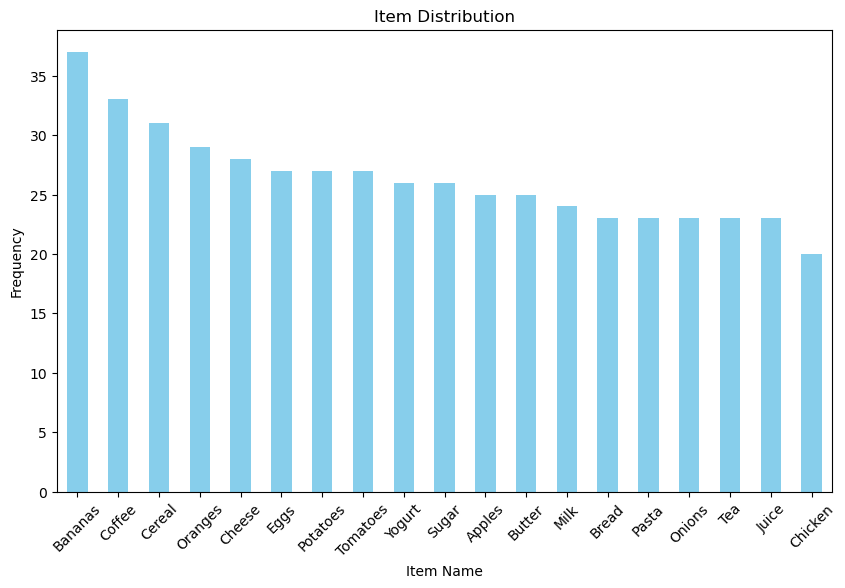

In [82]:
# Plot the item distribution
plt.figure(figsize=(10, 6))
Item_counts.plot(kind='bar', color='skyblue')
plt.title('Item Distribution')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

In [83]:
# Create a new column 'Item' which combines 'Item Name' and 'Quantity'
df['Item'] = df['Itemname'] + ' (' + df['Quantity'].astype(str) + ')'

In [84]:
# Drop unnecessary columns
df = df.drop(['Itemname', 'Quantity', 'Price', 'CustomerID'], axis=1)

In [85]:
# Pivot the data to create a binary matrix
basket_data = df.pivot_table(index='BillNo', columns='Item', values='BillNo', aggfunc=lambda x: 1, fill_value=0)

In [86]:
basket_data

Item,Apples (1),Apples (2),Apples (3),Apples (4),Apples (5),Bananas (1),Bananas (2),Bananas (3),Bananas (4),Bananas (5),...,Tomatoes (1),Tomatoes (2),Tomatoes (3),Tomatoes (4),Tomatoes (5),Yogurt (1),Yogurt (2),Yogurt (3),Yogurt (4),Yogurt (5)
BillNo,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1011,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1483,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1485,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
# Find frequent itemsets using Apriori algorithm with lower support
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)
frequent_itemsets

C:\Users\dhara\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.026144,(Apples (1))
1,0.026144,(Apples (2))
2,0.058824,(Apples (3))
3,0.026144,(Apples (4))
4,0.026144,(Apples (5))
...,...,...
214,0.013072,"(Yogurt (2), Pasta (4), Coffee (3))"
215,0.013072,"(Eggs (2), Sugar (4), Milk (5))"
216,0.013072,"(Yogurt (3), Tomatoes (3), Juice (1))"
217,0.013072,"(Tomatoes (3), Pasta (1), Potatoes (1))"


In [88]:
# Generate association rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5,num_itemsets=None)

In [89]:
# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

     antecedents    consequents   support  confidence       lift
0    (Bread (3))   (Apples (1))  0.013072    0.400000  15.300000
1   (Apples (1))    (Bread (3))  0.013072    0.500000  15.300000
2   (Coffee (5))   (Apples (1))  0.013072    0.333333  12.750000
3   (Apples (1))   (Coffee (5))  0.013072    0.500000  12.750000
4    (Pasta (4))   (Apples (2))  0.013072    0.666667  25.500000
5   (Apples (2))    (Pasta (4))  0.013072    0.500000  25.500000
6   (Apples (2))    (Sugar (4))  0.013072    0.500000  15.300000
7    (Sugar (4))   (Apples (2))  0.013072    0.400000  15.300000
8  (Bananas (3))   (Apples (3))  0.013072    0.181818   3.090909
9   (Apples (3))  (Bananas (3))  0.013072    0.222222   3.090909
